# 5.5 课后练习-8
 在一个线性可分离数据集上训练LinearSVC。然后在同一数据集上训练SVC和SGDClassifier。看看你是否可以用它们产生大致相同的模型。

这里使用Iris数据集：Iris中的Setosa和Versicolor类别是线性可分的

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = iris['data'][:, (2, 3)]
y = iris['target']
X[0], y[0]

(array([1.4, 0.2]), 0)

In [4]:
setosa_or_versicolor = (y == 0) | (y == 1)
setosa_or_versicolor

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [5]:
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.002, eta0=0.001, learning_rate='constant',
              random_state=42)

In [8]:
print("LinearSVC:               ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                     ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f})".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                [0.28475098] [[1.05364854 1.09903804]]
SVC:                      [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200) [0.117] [[0.77714169 0.72981762]]


绘制这三个模型的决策边界

In [9]:
# 计算决策边界的斜率和截距
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 将边界方程转换到原始的比例的数据中
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

In [10]:
import matplotlib
import matplotlib.pyplot as plt

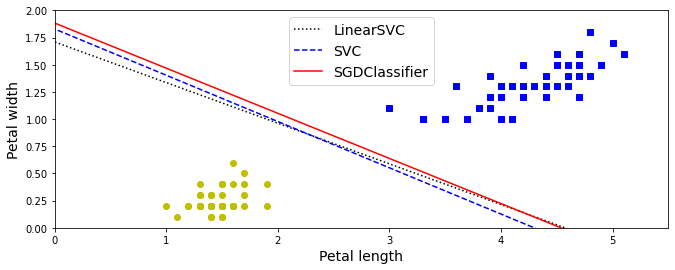

In [11]:
# 绘制所有的边界
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], 'k:', label='LinearSVC')
plt.plot(line2[:, 0], line2[:, 1], 'b--', label='SVC')
plt.plot(line3[:, 0], line3[:, 1], 'r-', label='SGDClassifier')

plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs') # versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo') # setosa

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.legend(loc="upper center", fontsize=14)

plt.axis([0, 5.5, 0, 2])

plt.show()